In [1]:
from collections import defaultdict

from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import kruskal, sem

from synet.generators import create_temporal_network
from synet.propagators.paint import paint_entropy
from synet.propagators.paths import path_entropy
from synet.propagators.mixing import mixing_entropy
from synet.analysis import entropy_windows, entropy_dt
from synet.visualization import plot_entropy_game

In [9]:
np.random.seed(1872631)
n_events = 2000
max_dt = 200
n_sample = 100

In [10]:
all_p_intern = np.arange(n_sample)/(n_sample-1)
all_results = defaultdict(lambda: [])
methods = {
    "paint": paint_entropy,
    "path": path_entropy,
    "mix": mixing_entropy,
}

path_kruskal = []
mix_kruskal = []

for p_intern in all_p_intern:
    cur_d_mix = []
    cur_d_path = []

    A, event_list, event_participants = create_temporal_network(n_events=n_events, p_intern=p_intern)

    for method_name, method_fn in methods.items():
        res_dt = entropy_dt(A, max_dt=max_dt, entropy_game=method_fn)
        all_results[method_name].append(np.sum(res_dt))



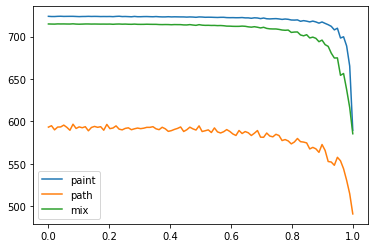

In [11]:
for method_name, results in all_results.items():
    plt.plot(all_p_intern, results, label=method_name)
plt.legend()
plt.show()

In [13]:
from scipy.stats import spearmanr
for method_name, results in all_results.items():
    print(method_name, spearmanr(all_p_intern, results))

paint SpearmanrResult(correlation=-0.9812421242124212, pvalue=7.066668612597281e-72)
path SpearmanrResult(correlation=-0.8947254725472547, pvalue=4.42653460638332e-36)
mix SpearmanrResult(correlation=-0.9892589258925891, pvalue=1.166881604933081e-83)
